# Artificial Neural Network Practice

In [2]:
# using Multi-layer Perceptron classifier.
from sklearn.neural_network import MLPClassifier

#basic dataset
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]

# lbfgs: one of the optimization way
# hidden_layer_sizes: number of node in first hidden layer: 5; second layer: 2
# random_state: Determines random number generation for weights and bias initialization
clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [3]:
# check weights
clf.coefs_

[array([[-0.15011367, -0.62860541, -0.90433213, -3.45938109, -0.63904618],
        [-0.73749132, -1.5947694 , -0.2793927 , -3.28854097,  0.0702225 ]]),
 array([[ 0.30838904, -0.14960207],
        [ 3.14928608, -0.65056811],
        [-0.54615798,  0.54407041],
        [ 4.36386369, -0.33753023],
        [ 0.34792663,  0.68091737]]),
 array([[-3.58233912,  2.68515229],
        [ 0.9049651 , -0.96123048]])]

In [4]:
#can check layer shape
[coef.shape for coef in clf.coefs_]
#it means 2 inputs, 5 first hidden layer, 2 second hidden layer, 2 outputs

[(2, 5), (5, 2), (2, 2)]

In [36]:
from os import system
system("pip install mglearn")

0

**USING Two_moons Dataset**

Text(0, 0.5, 'property 1')

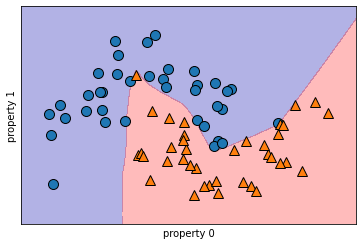

In [75]:
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

#hidden_layer -> default=100
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")


Text(0, 0.5, 'property 1')

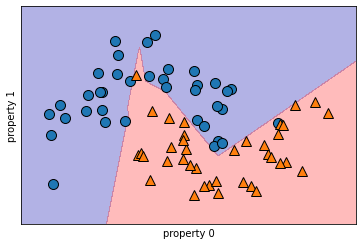

In [76]:
#decrease the number of hidden layers
mlp = MLPClassifier(max_iter = 1000, solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

Text(0, 0.5, 'property 1')

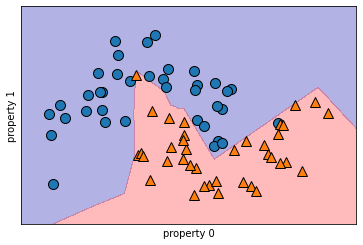

In [77]:
#modify decision boundary
#1. add hidden_layer
mlp = MLPClassifier(max_iter = 1000, solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

Text(0, 0.5, 'property 1')

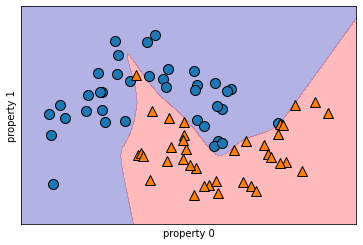

In [78]:
#2. using activation function (tanh)
mlp = MLPClassifier(max_iter = 1000, solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

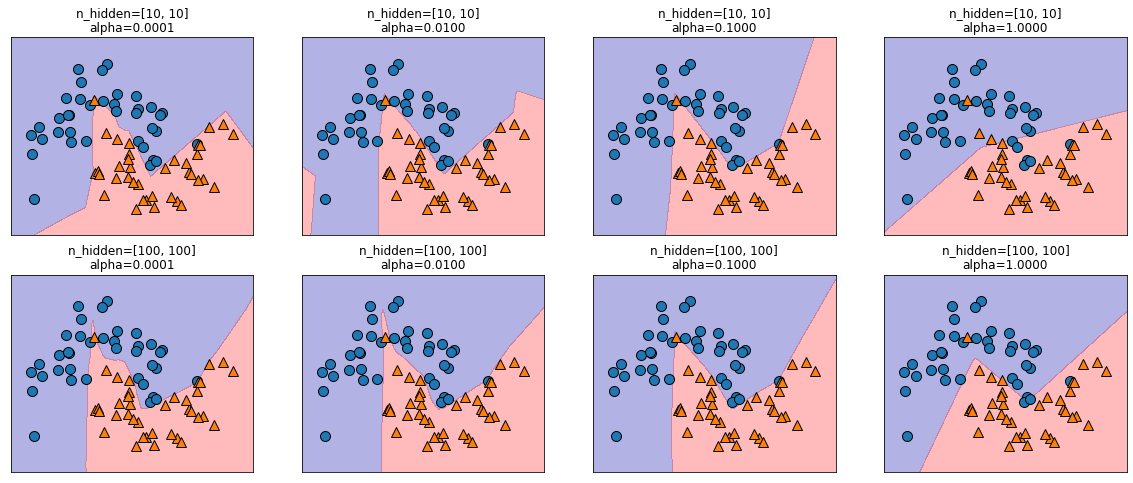

In [79]:
#3. using alpha parameter (compare)
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(max_iter = 1000, solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

**Using breast cancer dataset**

In [72]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

print("accuracy of train set: {:.2f}".format(mlp.score(X_train, y_train)))
print("accuracy of test set: {:.2f}".format(mlp.score(X_test, y_test)))

accuracy of train set: 0.93
accuracy of test set: 0.93


In [74]:
#mediate data scale
#calculate mean, std
mean_on_train = X_train.mean(axis = 0)
std_on_train = X_train.std(axis=0)

#now datasets mean = 0, std = 1
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter = 1000,alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("accuracy of train set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("accuracy of test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

accuracy of train set: 0.99
accuracy of test set: 0.97
